In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import metrics, datasets, preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [186]:
file='C:/Users/Murat/Desktop/Telco-Customer-Churn.csv'
df=pd.read_csv(file)

In [187]:
df.drop(["customerID"], axis=1, inplace=True) 

In [188]:
df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [189]:
df.loc[(df['Churn'] == 'No'), 'Churn'] = 0
df.loc[(df['Churn'] == 'Yes'), 'Churn'] = 1
#Churn ayarı

In [190]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [191]:
df.loc[(df['tenure'] < 10), 'tenureGroup'] = 'Yeni Müşteri'
df.loc[(df['tenure'] >= 10) & (df['tenure']< 50), 'tenureGroup'] = 'Bağı Sağlam'
df.loc[(df['tenure'] >= 50), 'tenureGroup'] = 'Eski Toprak'
df.head()
#tenure Gruplama

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Yeni Müşteri
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,Bağı Sağlam
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yeni Müşteri
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Bağı Sağlam
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yeni Müşteri


Text(0.5, 1.0, 'Eski Toprak Müşterilerin Churn Durumu')

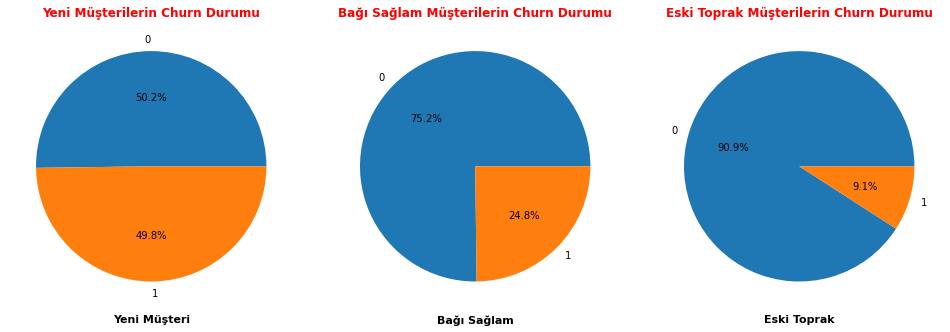

In [192]:
freq=pd.crosstab(df.Churn,df.tenureGroup)
plt.axes([0.00,0.05,1,1])
freq['Yeni Müşteri'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('Yeni Müşteri', fontsize = 11, weight='bold')
plt.title('Yeni Müşterilerin Churn Durumu',color="r", fontsize = 12, weight='bold')

plt.axes([0.75,0.05,1,1])
freq['Bağı Sağlam'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('Bağı Sağlam', fontsize = 11, weight='bold')
plt.title('Bağı Sağlam Müşterilerin Churn Durumu',color="r", fontsize = 12, weight='bold')

plt.axes([1.5,0.05,1,1])
freq['Eski Toprak'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('Eski Toprak', fontsize = 11, weight='bold')
plt.title('Eski Toprak Müşterilerin Churn Durumu',color="r", fontsize = 12, weight='bold')

In [193]:
freq=pd.crosstab(df.InternetService,df.Churn)
freq
#Frekans tablosu

Churn,0,1
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<AxesSubplot:xlabel='Churn', ylabel='InternetService'>

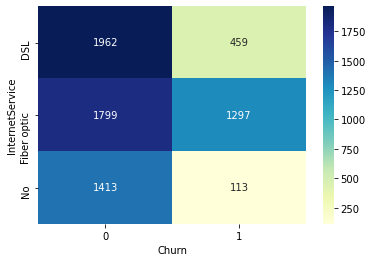

In [194]:
sns.heatmap(pd.crosstab(df.InternetService,df.Churn),cmap='YlGnBu',annot=True,cbar=True,fmt='g')
#Internet servisine göre churn olup olmama durumunun grafiği. Sayıların yüksek olduğu yer koyu renk

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

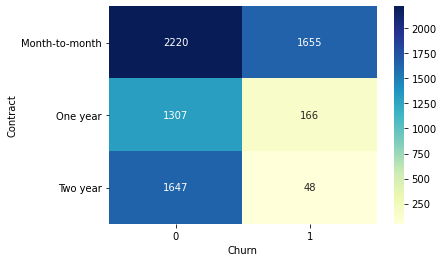

In [195]:
sns.heatmap(pd.crosstab(df.Contract,df.Churn),cmap='YlGnBu',annot=True,cbar=True,fmt='d')

<AxesSubplot:xlabel='OnlineBackup'>

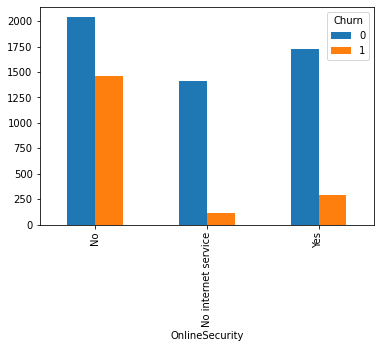

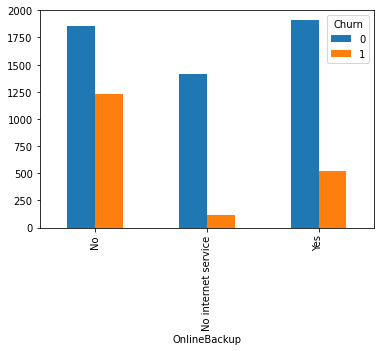

In [196]:
freq=pd.crosstab(df.OnlineSecurity,df.Churn)
freq.plot(kind='bar')

freq=pd.crosstab(df.OnlineBackup,df.Churn)
freq.plot(kind='bar')
#Bar grafiği.

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

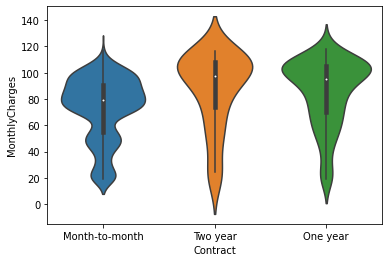

In [197]:
mask=(df.Churn==1)
sns.violinplot(x="Contract",y="MonthlyCharges",data=df[mask])

In [198]:
df.drop(["gender","Contract","PaymentMethod"], axis=1, inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

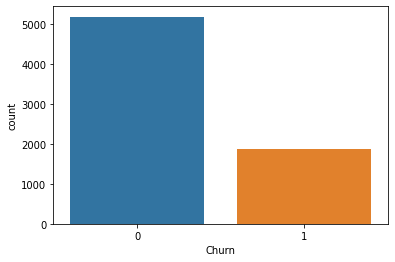

In [199]:
sns.countplot(x='Churn',data=df) #Count grafiği aldırma (Dengesiz veri seti)(Kaybolan müşterilerin dağılımı)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   object 


In [201]:
label_encoder = preprocessing.LabelEncoder()
df['Churn']= label_encoder.fit_transform(df['Churn'])
df['Churn'].unique()
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['Partner'].unique()
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['Dependents'].unique()
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])
df['PhoneService'].unique()
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['MultipleLines'].unique()
df['InternetService']= label_encoder.fit_transform(df['InternetService'])
df['InternetService'].unique()
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineSecurity'].unique()
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['OnlineBackup'].unique()
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['DeviceProtection'].unique()
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])
df['TechSupport'].unique()
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['StreamingTV'].unique()
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['StreamingMovies'].unique()
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['PaperlessBilling'].unique()
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges'])
df['TotalCharges'].unique()
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,29.85,2505,0,Yeni Müşteri
1,0,0,0,34,1,0,0,2,0,2,0,0,0,0,56.95,1466,0,Bağı Sağlam
2,0,0,0,2,1,0,0,2,2,0,0,0,0,1,53.85,157,1,Yeni Müşteri
3,0,0,0,45,0,1,0,2,0,2,2,0,0,0,42.30,1400,0,Bağı Sağlam
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,925,1,Yeni Müşteri


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int32  
 5   MultipleLines     7043 non-null   int32  
 6   InternetService   7043 non-null   int32  
 7   OnlineSecurity    7043 non-null   int32  
 8   OnlineBackup      7043 non-null   int32  
 9   DeviceProtection  7043 non-null   int32  
 10  TechSupport       7043 non-null   int32  
 11  StreamingTV       7043 non-null   int32  
 12  StreamingMovies   7043 non-null   int32  
 13  PaperlessBilling  7043 non-null   int32  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   int32  
 16  Churn             7043 non-null   int32  


In [173]:
df.head(20)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,29.85,2505,0,Yeni Müşteri
1,0,0,0,34,1,0,0,2,0,2,0,0,0,0,56.95,1466,0,Bağı Sağlam
2,0,0,0,2,1,0,0,2,2,0,0,0,0,1,53.85,157,1,Yeni Müşteri
3,0,0,0,45,0,1,0,2,0,2,2,0,0,0,42.30,1400,0,Bağı Sağlam
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,925,1,Yeni Müşteri
5,0,0,0,8,1,2,1,0,0,2,0,2,2,1,99.65,6104,1,Yeni Müşteri
6,0,0,1,22,1,2,1,0,2,0,0,2,0,1,89.10,1550,0,Bağı Sağlam
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,29.75,2609,0,Bağı Sağlam
8,0,1,0,28,1,2,1,0,0,2,2,2,2,1,104.80,2646,1,Bağı Sağlam
9,0,0,1,62,1,0,0,2,2,0,0,0,0,0,56.15,3022,0,Eski Toprak


In [203]:
X = df.loc[:,['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','TotalCharges']]
y = df['Churn']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)#veriyi train ve test olarak ayırdık(veri setinin yarısını alarak)

In [204]:
#Lojistik regresyon sınıflayıcı
LR = LogisticRegression(solver= 'liblinear', fit_intercept = True)
results_LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Test accuracy:', LR.score(X_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred),
recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

CV_scores_LR = cross_val_score(LR, X, y, cv=10) 
print('CV Accuracy', statistics.mean(CV_scores_LR))
CV_scores_LR


Test accuracy: 0.8100511073253833
Precision:0.6937, Recall:0.5243, F1:0.5972
CV Accuracy 0.8020740651192779


array([0.80141844, 0.8070922 , 0.79007092, 0.82528409, 0.78977273,
       0.78977273, 0.80539773, 0.80823864, 0.79829545, 0.80539773])

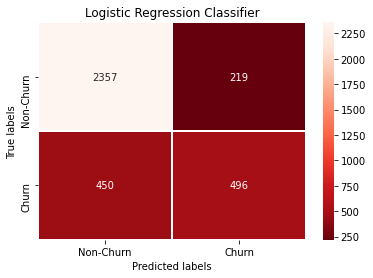

In [205]:
#Confusion matrix #Tahmini sınıf
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Reds_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Classifier')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [206]:
#Karar ağacı yapısı desicion tree (Bagging classifier Torbalama sınıflayıcı)
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
BG = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results_BG = model_selection.cross_val_score(BG, X_train, y_train, cv=kfold)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print('Test accuracy:', BG.score(X_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_BG),
recall_score(y_test, y_pred_BG), f1_score(y_test, y_pred_BG)))
CV_scores_BG = cross_val_score(BG, X, y, cv=10) #10 ker crossvalide
print('CV Accuracy', statistics.mean(CV_scores_BG))

c:\users\murat\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Test accuracy: 0.7745599091425327
Precision:0.6067, Recall:0.4567, F1:0.5211
CV Accuracy 0.7807724854932302


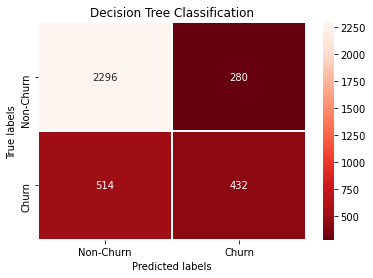

In [207]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_BG)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Reds_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn']);

In [208]:
# Random Forest Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
RF = RandomForestClassifier(n_estimators=100, max_features=3)
results_RF = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print('Test accuracy:', RF.score(X_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}'.format(precision_score(y_test, y_pred_RF),
recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF)))
CV_scores_RF = cross_val_score(RF, X, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_RF))

c:\users\murat\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Test accuracy: 0.7793867120954003
Precision:0.6267, Recall:0.4419, F1:0.5183
CV Accuracy 0.7851760960670535


[Text(0, 0.5, 'Non-Churn'), Text(0, 1.5, 'Churn')]

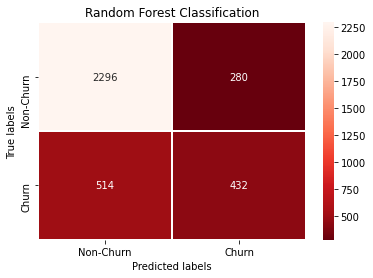

In [209]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_BG)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Reds_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classification')
ax.xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Non-Churn', 'Churn'])

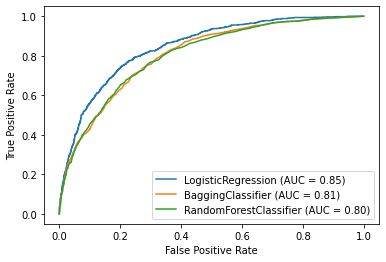

In [210]:
#Sınıflama sonuçları için grafik
classifiers = [LR, BG,RF]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [211]:
data = [['LR', statistics.mean(CV_scores_LR),LR.score(X_test, y_test)],
['BG', statistics.mean(CV_scores_BG), BG.score(X_test, y_test)],
['RF', statistics.mean(CV_scores_RF), RF.score(X_test, y_test)]]
df = pd.DataFrame(data, columns = ['Model', 'CV_Accuracy', 'Test Accuracy'])

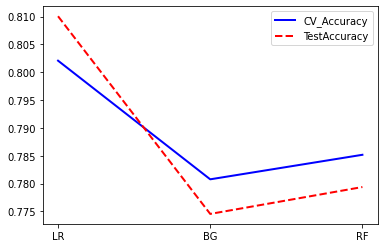

In [212]:
plt.plot( 'Model', 'CV_Accuracy', data=df, marker='', color='blue', linewidth=2)
plt.plot( 'Model', 'Test Accuracy', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="TestAccuracy")
plt.legend()
#TestAccuracy ve cross validationu grafikte karşılaştırma